In [1]:
print("I am Mona Darling143")

I am Mona Darling143


In [99]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
leads = pd.read_csv("/Users/haraprasad.tripathy/Downloads/Lead_Scoring_Assignment/Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [101]:
leads.shape

(9240, 37)

In [102]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [103]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [104]:
#Checking for duplicates

print(leads["Lead Number"].is_unique)
print(leads["Prospect ID"].is_unique)

True
True


In [105]:
#Drop above both columns as they have unique values

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [106]:
#Handling Select values

leads = leads.replace('Select', np.nan)

In [107]:
#Checking for Null Values

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [108]:
#Calculating the percentage of Null values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [109]:
#Deleting the columns having Null Values more than 45%
leads=leads.drop(['Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
                            'Asymmetrique Profile Index',
                            'Asymmetrique Activity Index',
                            'How did you hear about X Education',],axis =1)

In [110]:
print(leads.shape)
leads.head()

(9240, 28)


Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country  ... Digital Advertisement  \
0  Page Visited on Website     NaN  ...                    No   
1             Email Opened   India  ...                    No   
2             Email Opened   India  ...                    No   
3              Unreachable   India  ...                    No   
4        Converted to Lead   India  ...                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 28 columns]

In [111]:
#Again checking for null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [112]:
#Some columns have all unique values, So we can drop them as they dont help in Analysis

leads=leads.drop(['Magazine','Receive More Updates About Our Courses',
                  'I agree to pay the amount through cheque','Get updates on DM Content',
                  'Update me on Supply Chain Content'],axis=1)

In [113]:
#We still have null value in many columns, cannot delete these columns as they help in Analysis

# We can replace there null values with Not provided. Remember we are dealing with categorical values only

leads['Specialization'] = leads['Specialization'].fillna('not provided')
leads['City'] = leads['City'].fillna('not provided')
leads['Tags'] = leads['Tags'].fillna('not provided')
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not provided')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not provided')
leads['Country'] = leads['Country'].fillna('not provided')
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [114]:
#Again checking for null values percentage

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [115]:
leads.shape

(9240, 23)

In [116]:
#Values of Country columns

leads['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
Canada                     4
South Africa               4
Germany                    4
Sweden                     3
Ghana                      2
Uganda                     2
Netherlands                2
China                      2
Philippines                2
Italy                      2
Bangladesh                 2
Belgium                    2
Asia/Pacific Region        2
Switzerland                1
Sri Lanka                  1
Vietnam                    1
Kenya                      1
Russia                     1
Tanzania      

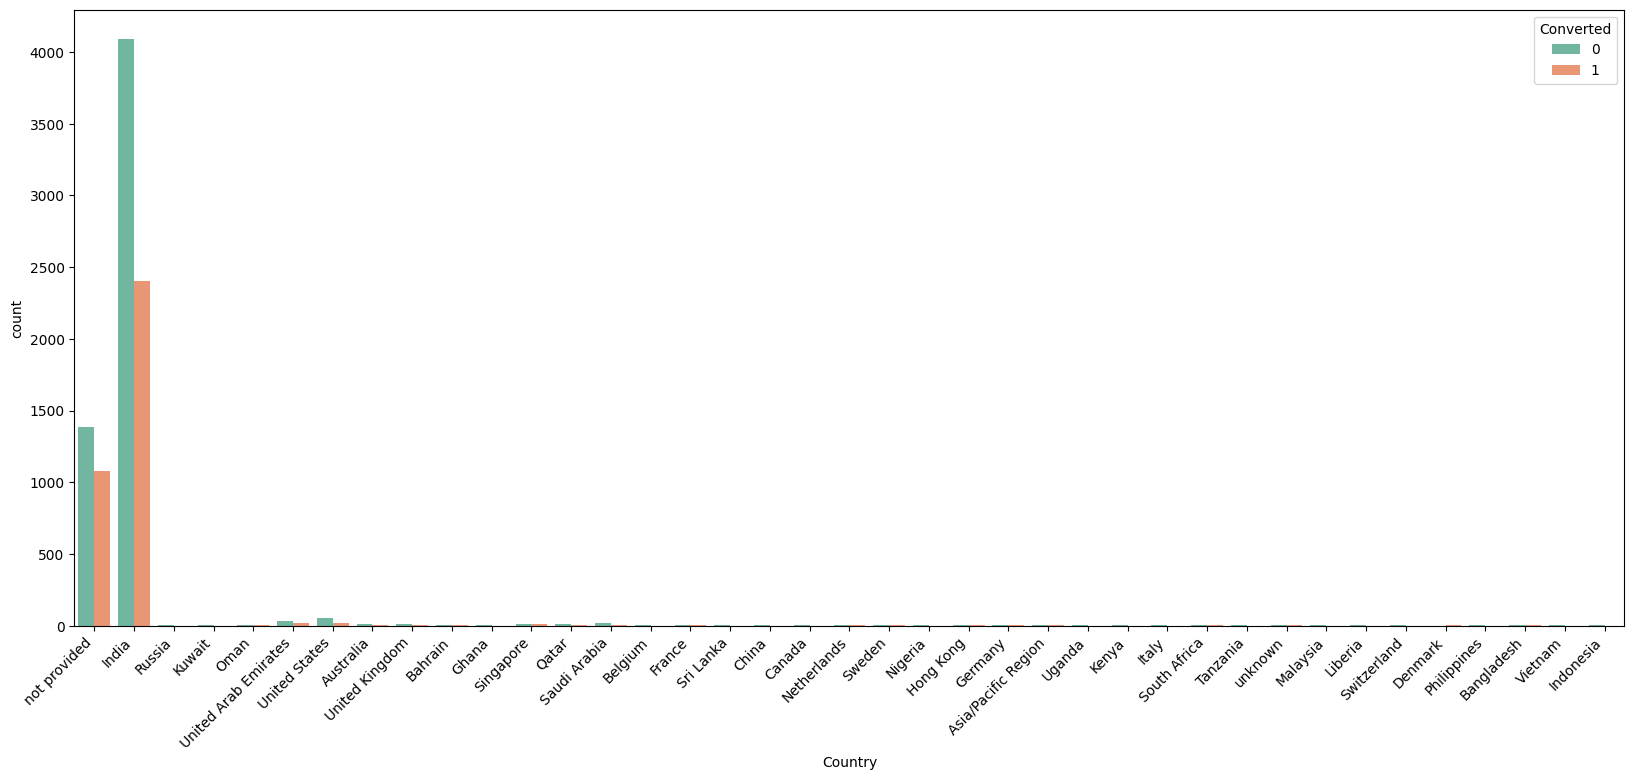

In [117]:
#plotting spread of Country columnn 
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Country',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [118]:
#As India is the most occured we can replace missing value with India

leads['Country'] = leads['Country'].replace('not provided','India')

In [119]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Country',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [120]:
#As most percentage of values are of India, we can delete country column

leads=leads.drop(['Country'],axis=1)

In [121]:
leads.shape

(9240, 22)

In [122]:
#Values of City columns

leads['City'].value_counts()

not provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [123]:
leads['City'] = leads['City'].replace('not provided','Mumbai')

In [124]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='City',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [125]:
#We can see most of the leads are generated from Mumbai. And Conversion rate is also good in Mumbai

In [126]:
#Values of 'What is your current occupation' columns

leads['What is your current occupation'].value_counts()

Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [127]:
#As current occupation is missing they may mostly unemployed, replacing missing values with Unemployed

leads['What is your current occupation'] = leads['What is your current occupation'].replace('not provided','Unemployed')
leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

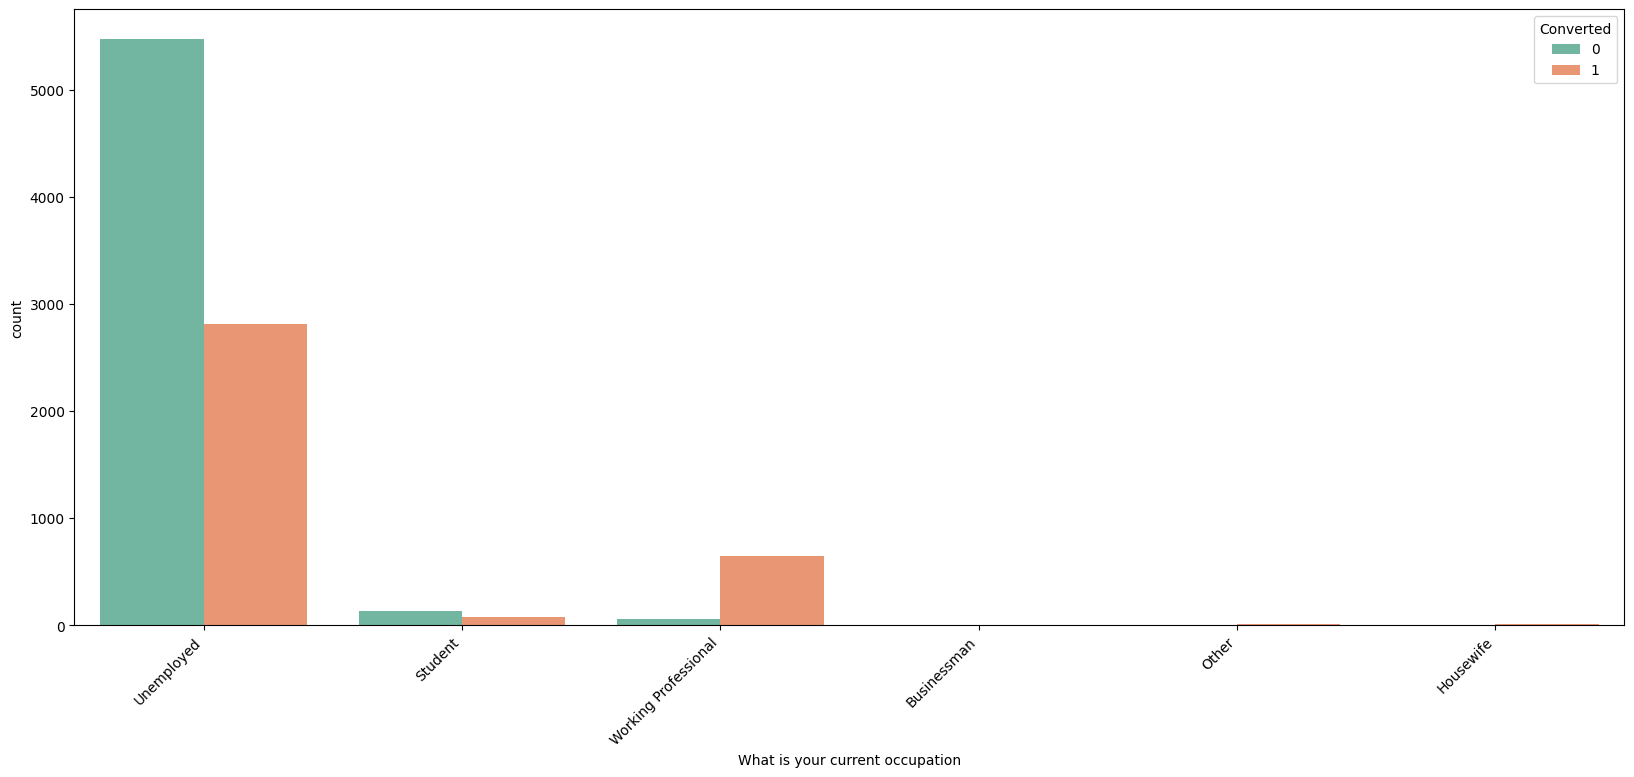

In [128]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='What is your current occupation',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [129]:
#Working Professional are joining the course. We should focus on generating leads from Working professional category
#Great number of leads from Unemployed category

In [130]:
#Values of Specialization columns

leads['Specialization'].value_counts()

not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [131]:
#May student or unemployed people didnt provide specialization as they dont have one, we can replace it to not specified

leads['Specialization'] = leads['Specialization'].replace('not provided', 'Not Specified')

In [132]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Specialization',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [133]:
#We can see different Management specizlization, has good number of leads and conversion rate. So cant lose the data

In [134]:
#Values of 'What is your current occupation' columns

leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
not provided                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [135]:
#Replacing not provided to better career Prospects

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace('not provided','Better Career Prospects')


leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [136]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='What matters most to you in choosing a course',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [137]:
#It is clear we can remove this column

leads=leads.drop(['What matters most to you in choosing a course'],axis=1)

print(leads.shape)

(9240, 21)


In [138]:
#Values of 'Lead Source' columns

leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
WeLearn                 1
Pay per Click Ads       1
blog                    1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [139]:
# WE can see there is a variation of Google and Facebook should be combined


leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

print(leads.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [140]:
#As there are some null values in Lead source

leads['Lead Source'] = leads['Lead Source'].fillna('Others')

In [141]:
#Adding all low frequency Lead Source to Others

leads['Lead Source'] = leads['Lead Source'].replace(['Pay per Click Ads','WeLearn','Press_Release',
                                                     'youtubechannel','welearnblog_Home'
                                                     ,'Click2call','blog','bing',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

print(leads['Lead Source'].value_counts())

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                57
Social Media          57
Name: Lead Source, dtype: int64


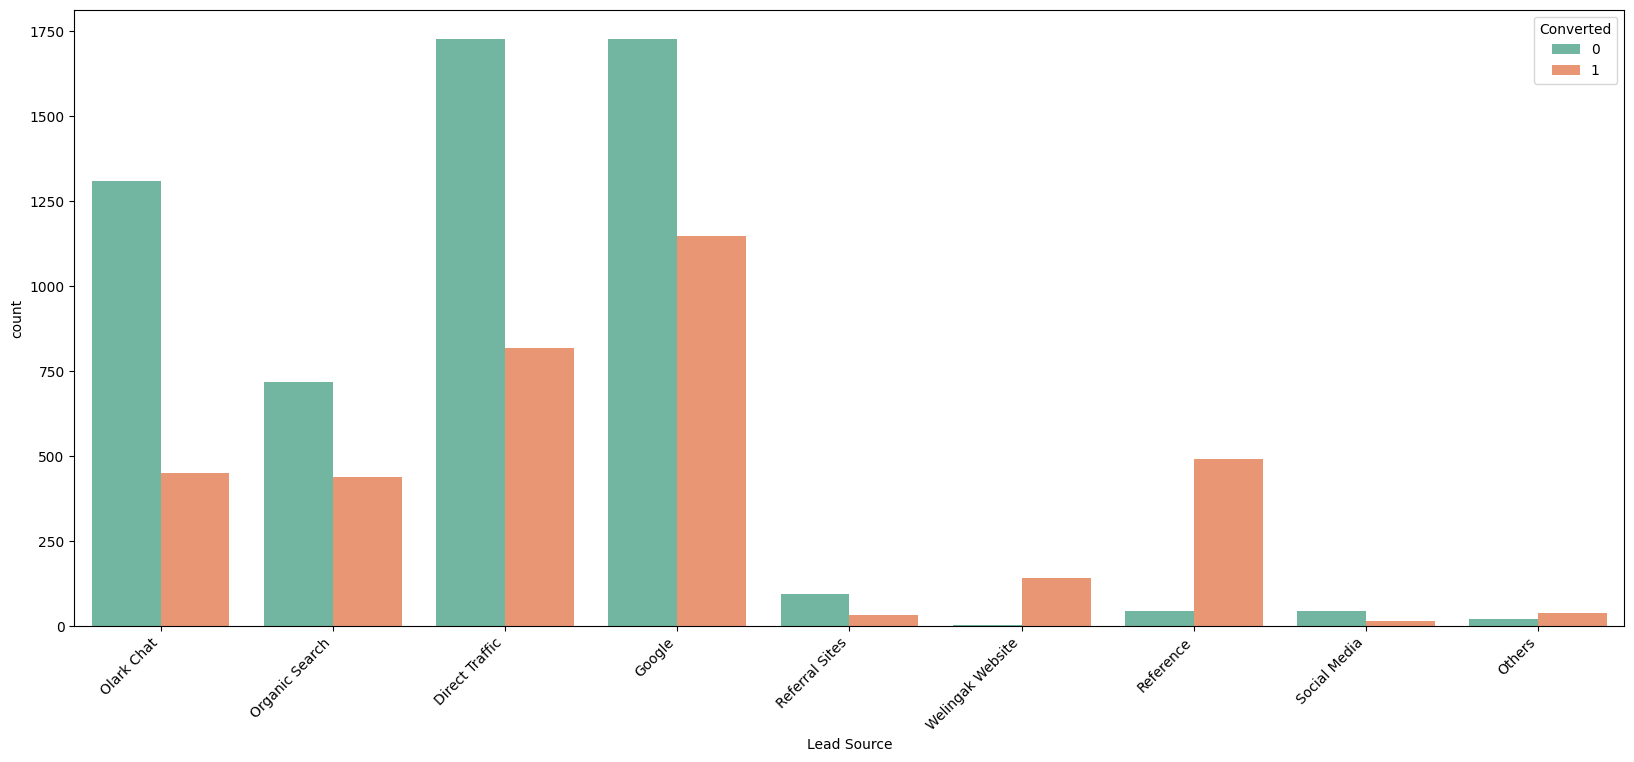

In [142]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Lead Source',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [143]:
#We can see maximum Leads are generated From Google and Direct Traffic
#Focus should be on increasing Conversion rate for Google,Direct Traffic, Olark Chat, Organic Search
#Conversion rate is high for Reference and Wellingak Website. But we must focus on increasing the Leads generated from these sources


In [144]:
#Values of 'Tags' columns

leads['Tags'].value_counts()

not provided                                         3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

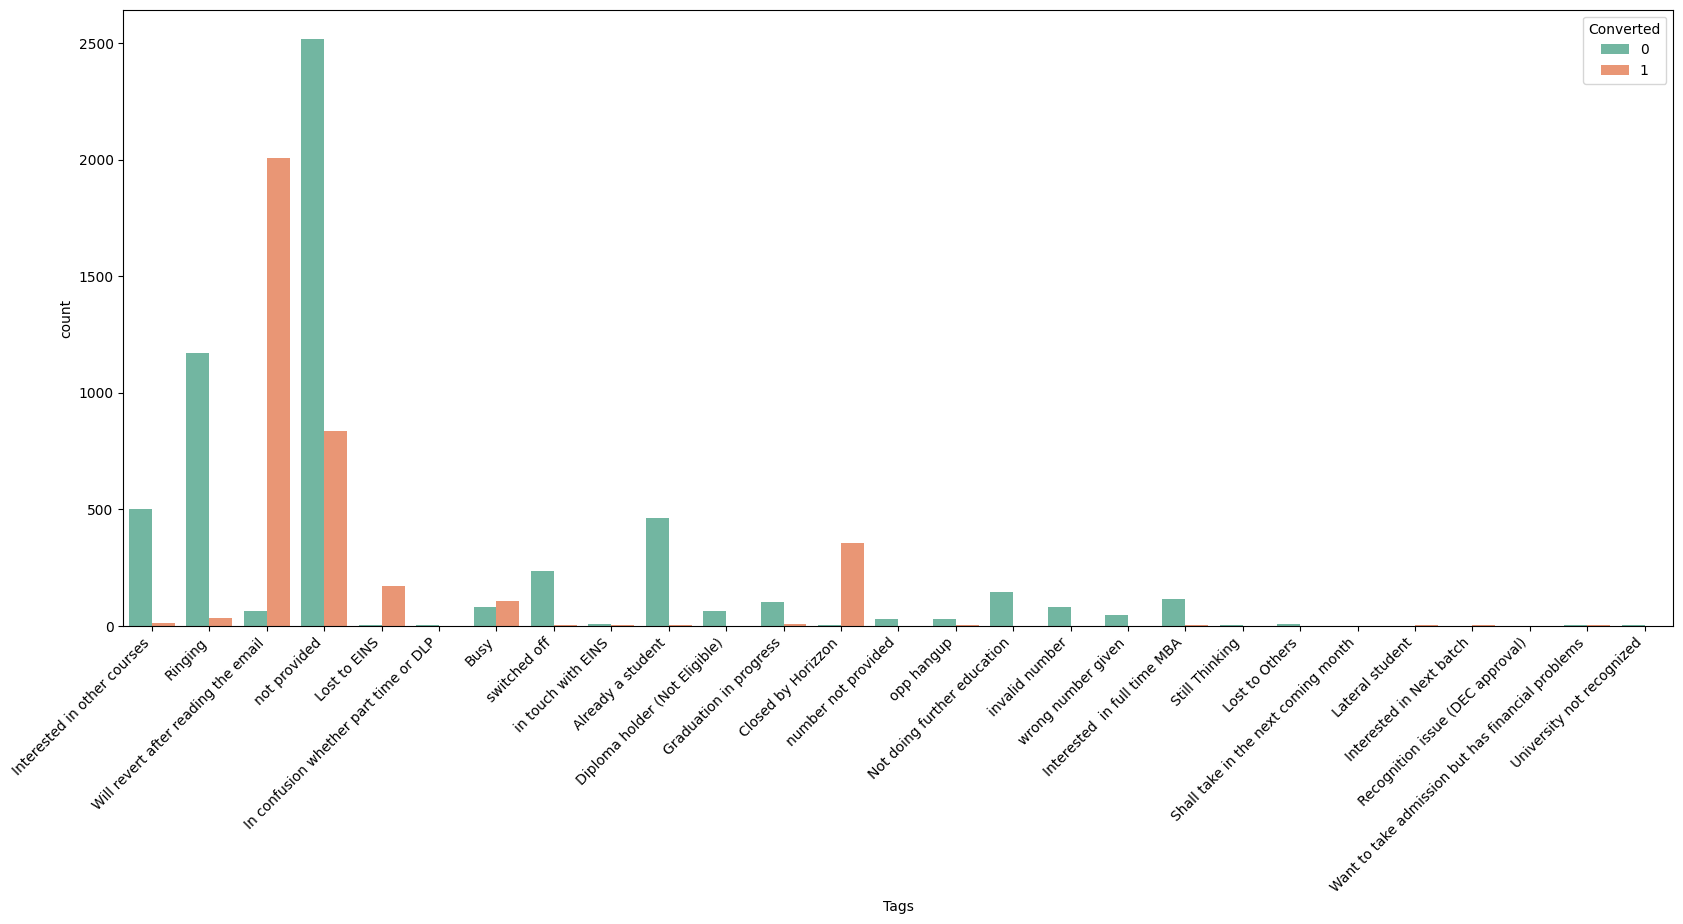

In [145]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Tags',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

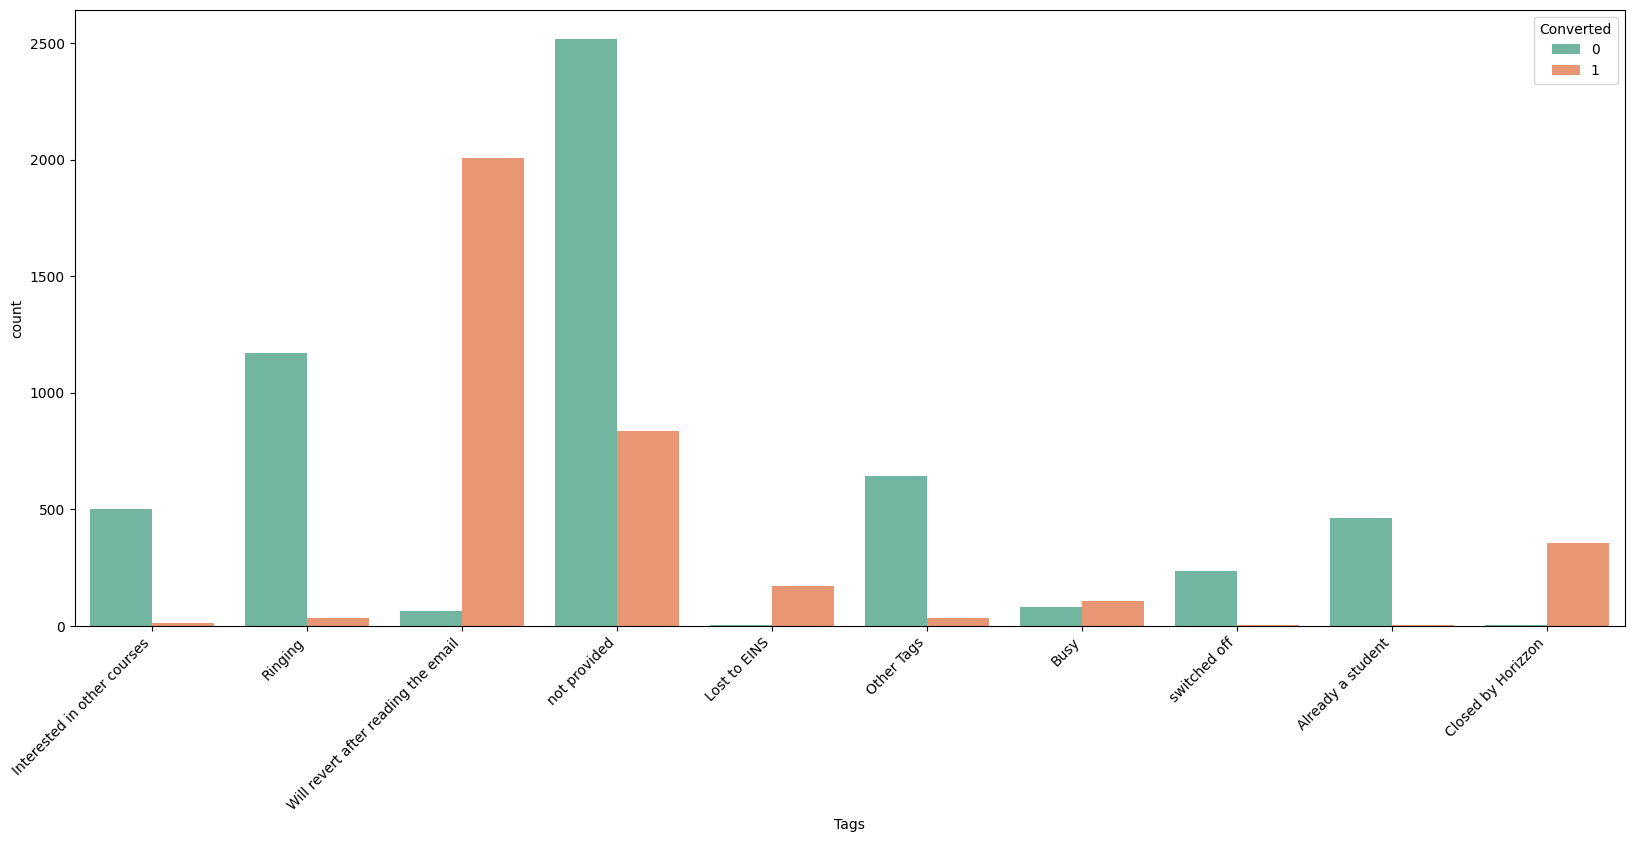

In [146]:
#Replacing the Low Freq Tags with "Other Tags"

leads['Tags'] = leads['Tags'].replace(['Still Thinking','Lost to Others','opp hangup',
                                                     'Want to take admission but has financial problems',
                                                     'Interested in Next batch','Shall take in the next coming month',
                                                     'Lateral student','Recognition issue (DEC approval)'
                                                    ,'University not recognized','number not provided',
                                                    'in touch with EINS','wrong number given','invalid number',
                                                    'Graduation in progress','Interested  in full time MBA',
                                      'Not doing further education','In confusion whether part time or DLP',
                                      'Diploma holder (Not Eligible)'] ,'Other Tags')

plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Tags',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [147]:
#Values of 'Last Activity' columns

leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [148]:
#As there are some null values in Last Activity

leads['Last Activity'] = leads['Last Activity'].fillna('Others')


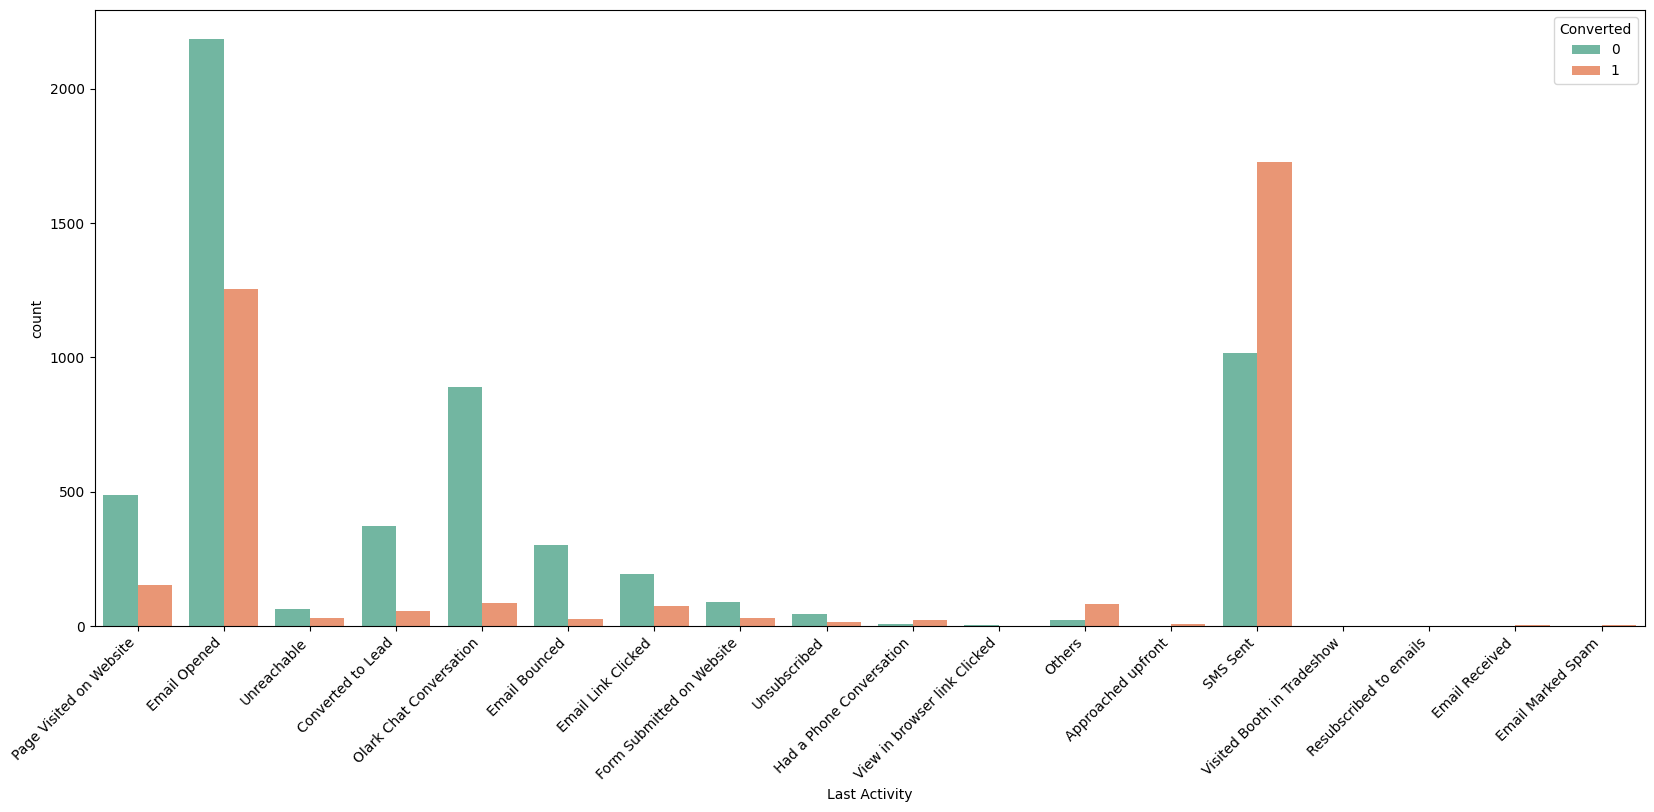

In [149]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Last Activity',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

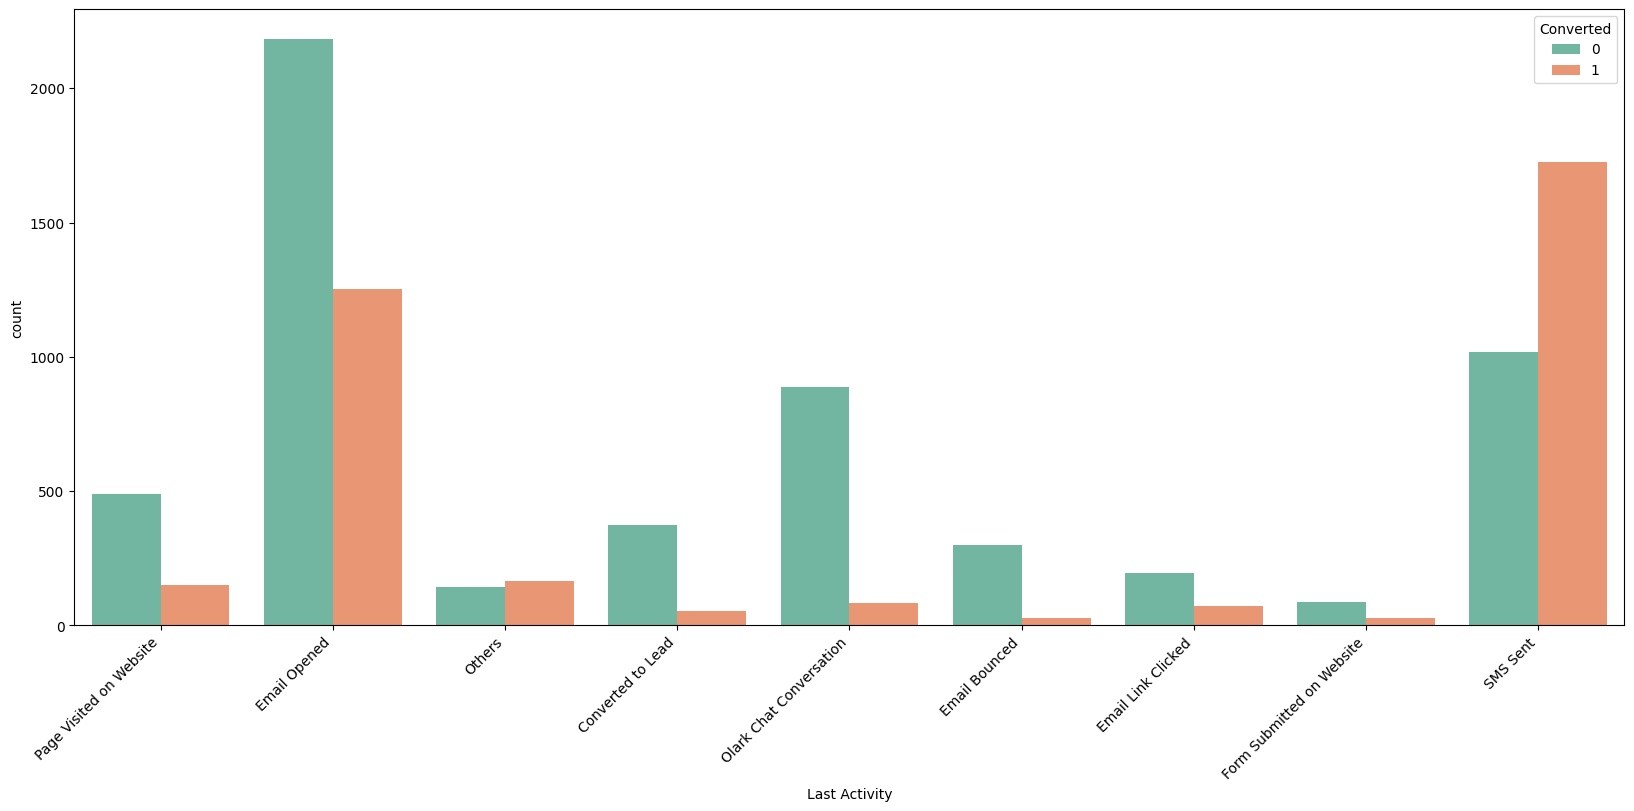

In [150]:
#Replace low freq with Othrs

leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation','View in browser link Clicked',
                                                        'Approached upfront','Visited Booth in Tradeshow',
                                                         'Resubscribed to emails','Email Received',
                                                        'Email Marked Spam'],'Others')

plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Last Activity',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [151]:
#Good leads generated from Last Activity as Email Opened
#Conversion rate good for SMS sent Last Activity

In [152]:
#checking Null Values

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

In [153]:
#Deleting the rows having null values

leads = leads.dropna()

In [154]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [155]:
#Values of 'Last Activity' columns

leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

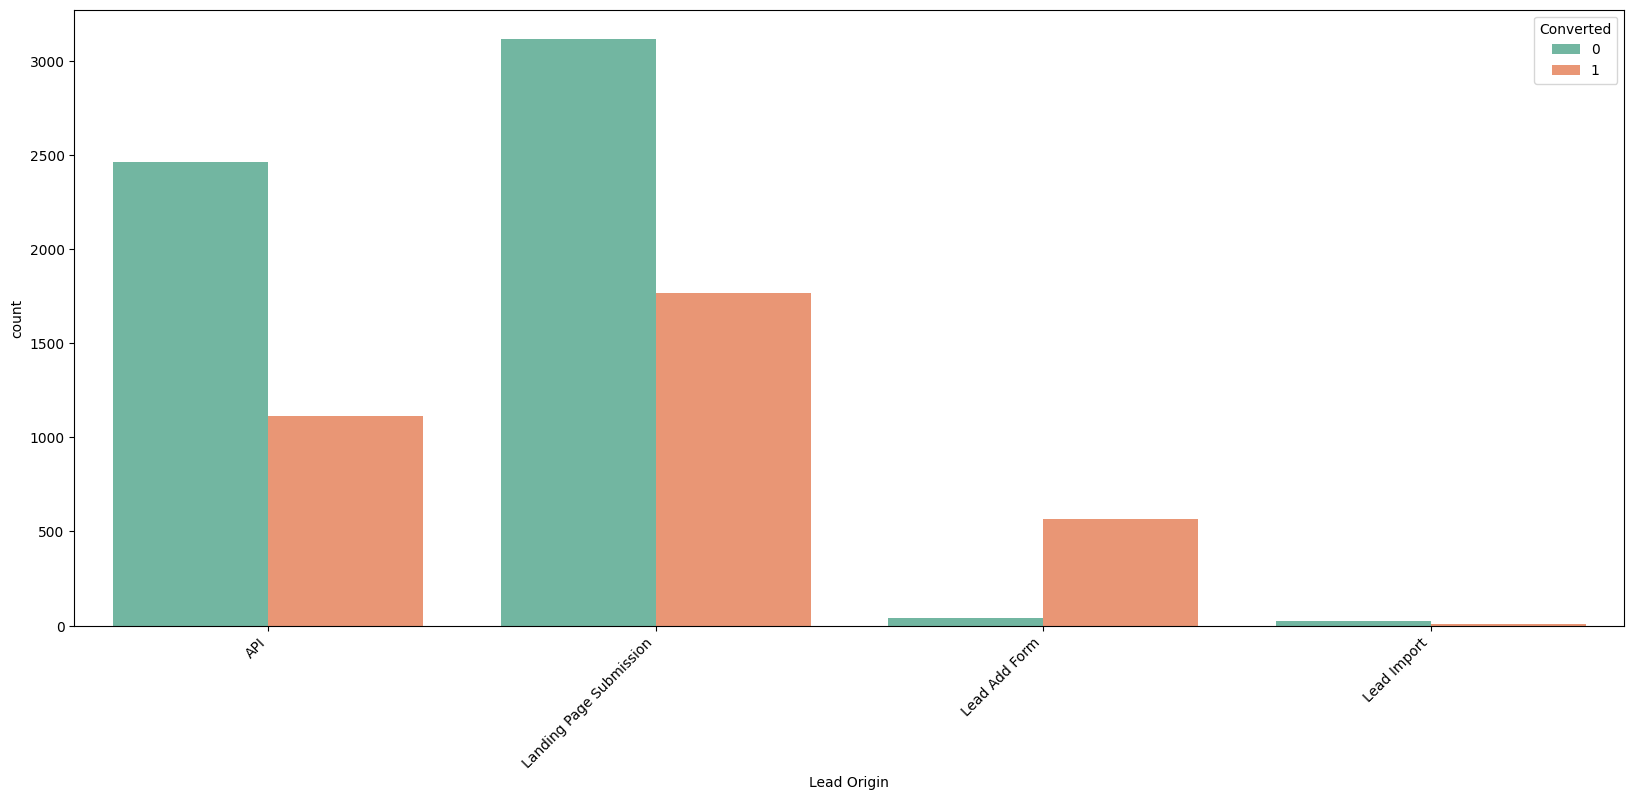

In [156]:
plt.figure(figsize=(20,8))
s1=sns.countplot(x ='Lead Origin',hue='Converted',data = leads, palette = "Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [157]:
#Good no.of Leads are generated from API and Landing Page Submission
# Converion rate is good for Lead Add form and Landing Page Submission.
#We should focus on generating more leads for Lead Add Form and rising the conversion rate for API

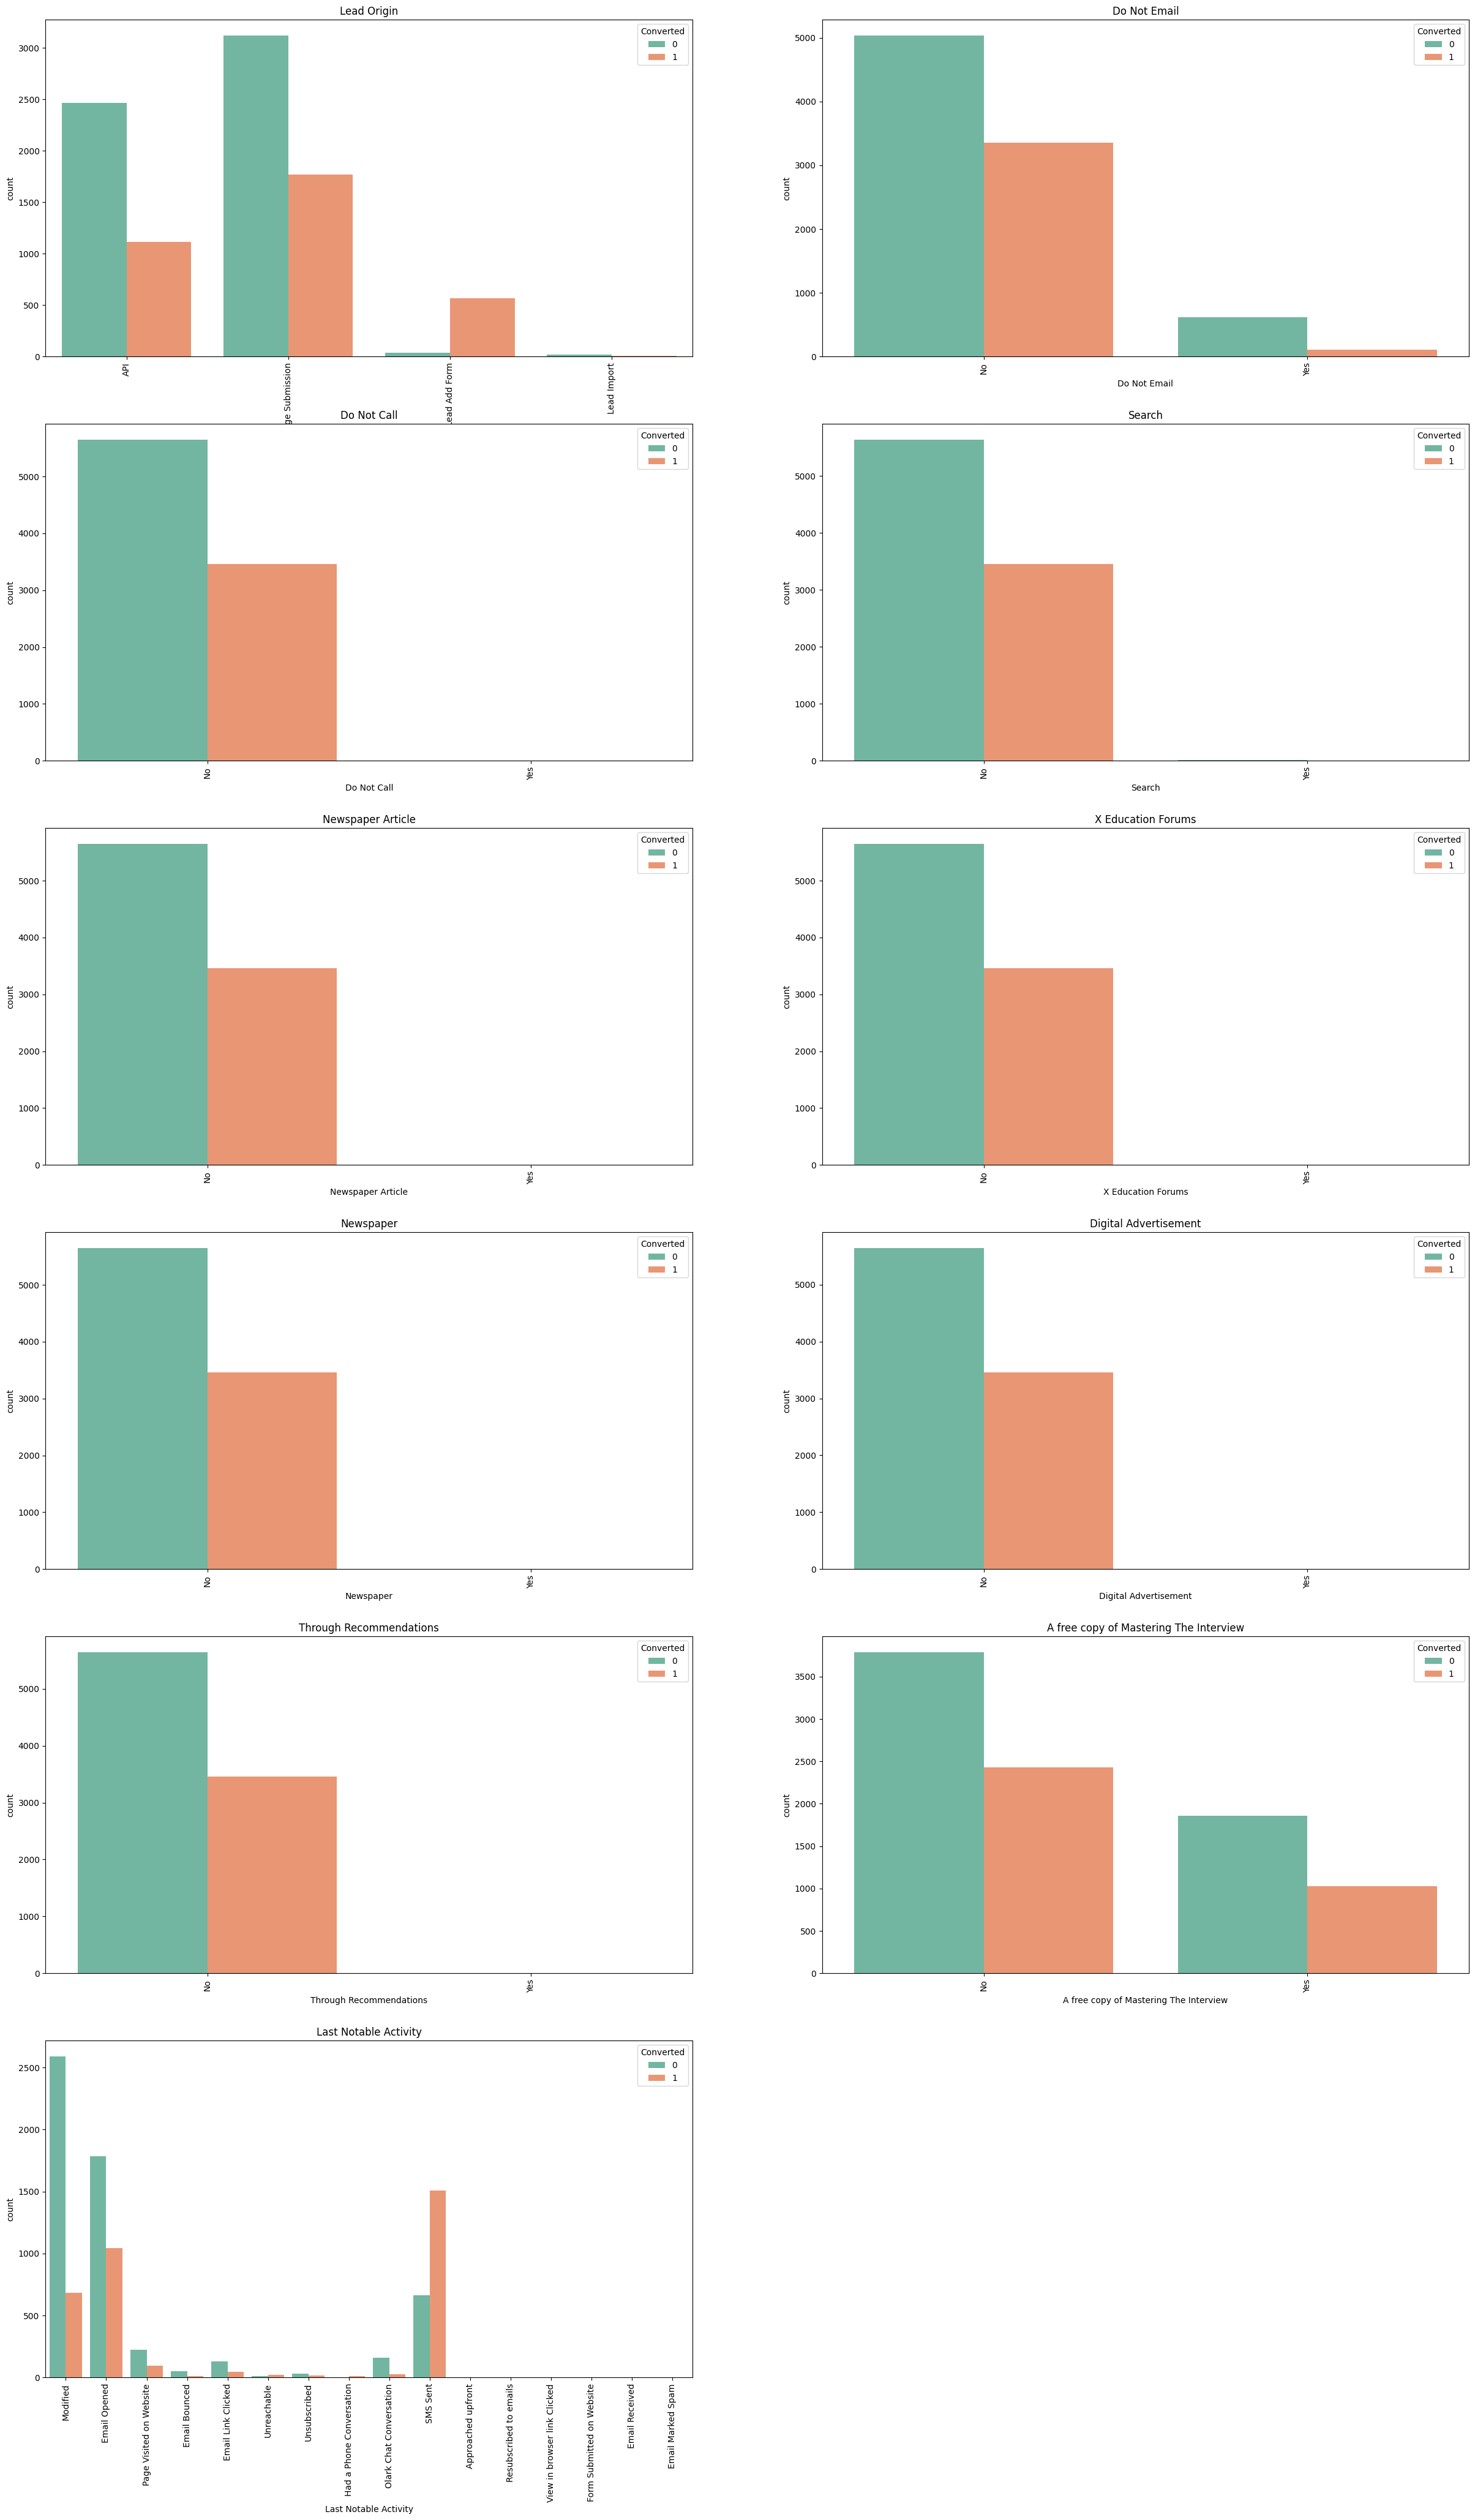

In [158]:
plt.figure(figsize = (30,50))
plt.subplot(6,2,1)
sns.countplot(x ='Lead Origin',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(x ='Do Not Email',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(x ='Do Not Call',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(x ='Search',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(x ='Newspaper Article',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(x ='X Education Forums',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(x ='Newspaper',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(x ='Digital Advertisement',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(x ='Through Recommendations',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(x ='A free copy of Mastering The Interview',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(x ='Last Notable Activity',hue='Converted',data = leads, palette = "Set2").tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

In [159]:
#Some columns are not helpful in Analysis:

leads=leads.drop(['Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations'],axis=1)


In [181]:
leads=leads.drop(['Do Not Call'],axis=1)

In [160]:
print(leads.shape)
print(leads.info())

(9103, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-

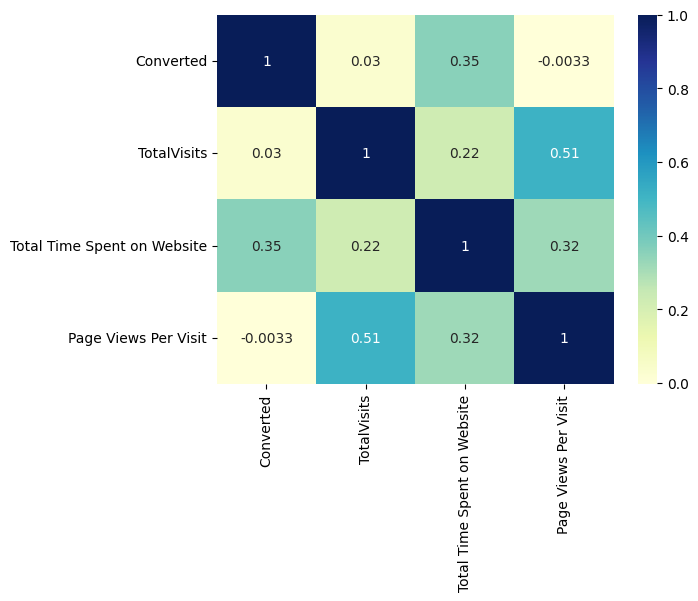

In [161]:
#Analysing the numerical variable

#Doing a heat Map

sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

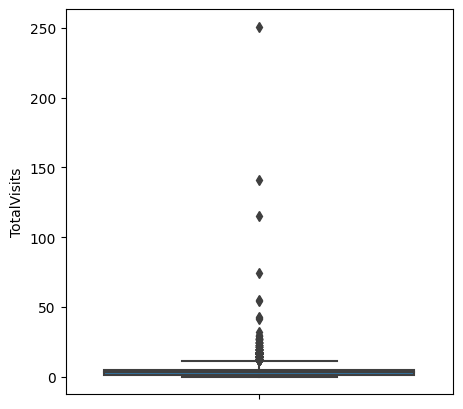

In [162]:
#Analysing the Outlier of TotalVisits

plt.figure(figsize = (5,5))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

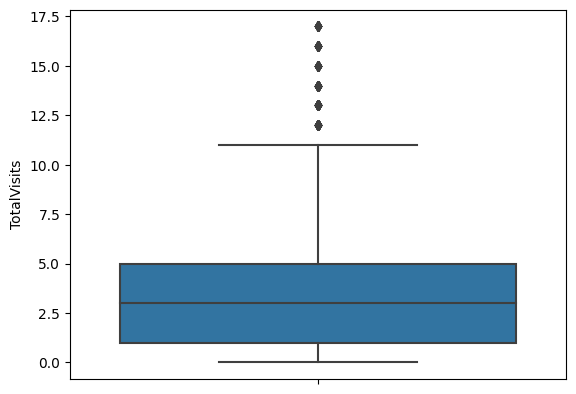

In [163]:
#Using percentile method to treat the outliers: 

upper_limit = leads['TotalVisits'].quantile(0.99)
lower_limit = leads['TotalVisits'].quantile(0.01)

leads = leads[leads['TotalVisits'] <= upper_limit]
leads = leads[leads['TotalVisits'] >= lower_limit]

sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [164]:
leads.shape

(9020, 15)

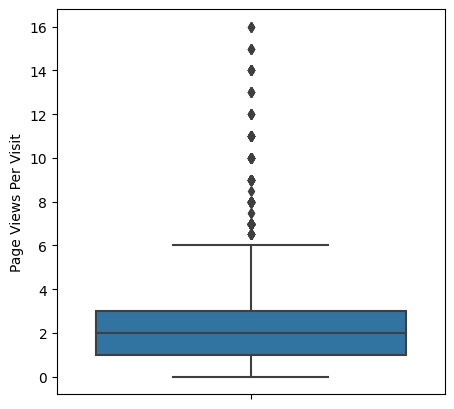

In [165]:
#Analysing the Outlier of Page_Views_Per_Visit

plt.figure(figsize = (5,5))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [166]:
#Ohhh outliers present significantly

leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

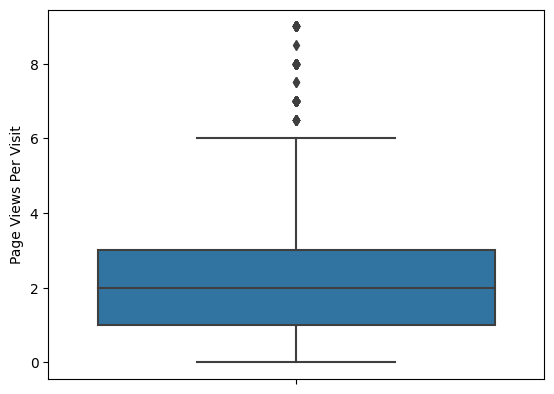

In [167]:
#Using percentile method to treat the outliers: 

upper_limit = leads['Page Views Per Visit'].quantile(0.99)
lower_limit = leads['Page Views Per Visit'].quantile(0.01)

leads = leads[leads['Page Views Per Visit'] <= upper_limit]
leads = leads[leads['Page Views Per Visit'] >= lower_limit]

sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [168]:
#Analysing the Outlier of TotalVisits

plt.figure(figsize = (5,5))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

In [169]:
leads['Total Time Spent on Website'].describe()

count    8953.000000
mean      477.736401
std       544.180321
min         0.000000
25%         5.000000
50%       240.000000
75%       911.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [ ]:
#No Outlier seen

In [170]:
leads.shape

(8953, 15)

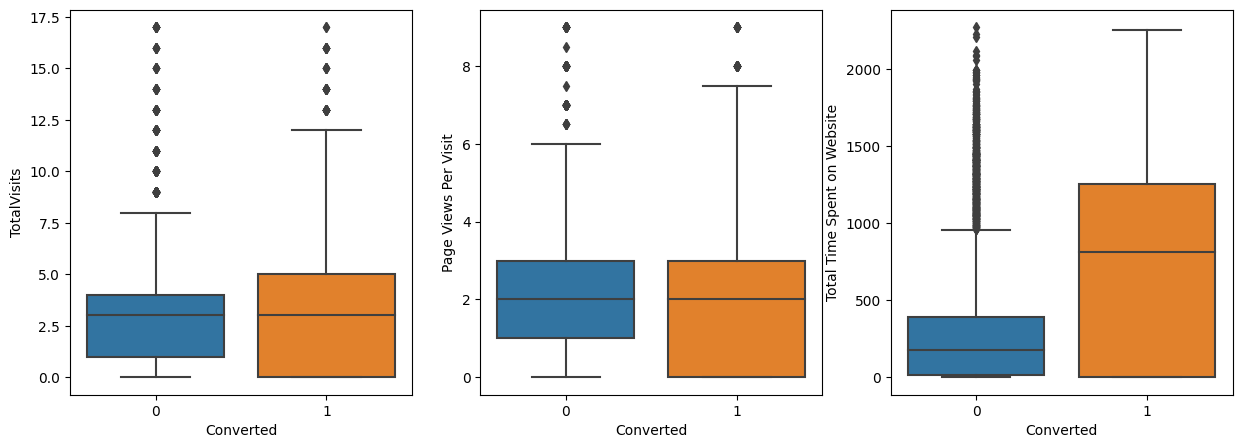

In [177]:
#Comparing the numerical values

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

In [ ]:
#Clearly seen Leads spending more time on the website have good convertion rate.

In [182]:
#List of Categorical Values:

categori_colmns= leads.select_dtypes(include=['object']).columns
categori_colmns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [183]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead            Not Specified   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [184]:
#Tags are not needed for Model creation, so can be dropped

leads=leads.drop(['Tags'],axis=1)


KeyError: "['Tags'] not found in axis"

In [185]:
print(leads.shape)

(8953, 13)


In [189]:
# Create dummy variables

dummy = pd.get_dummies(leads[['Lead Origin','Specialization' ,'Lead Source', 
                                  'Do Not Email', 'Last Activity', 
                                  'What is your current occupation','A free copy of Mastering The Interview',
                                  'Last Notable Activity','City']], drop_first=True)

In [190]:
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Specialization_Business Administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  ...  \
0                                         0  ...   
1                                         0  ...   
2                                         0  ...   
3                                         0  ...   
4                                         0  ...   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  City_Other Cities  \
0                                                  0                   0   
1                                                  0                   0   
2                                                  0                   0   
3                                                  0                   0   
4                                                  0                   0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4

In [191]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Origin_Landing Page Submission                   8953 non-null   uint8
 1   Lead Origin_Lead Add Form                             8953 non-null   uint8
 2   Lead Origin_Lead Import                               8953 non-null   uint8
 3   Specialization_Business Administration                8953 non-null   uint8
 4   Specialization_E-Business                             8953 non-null   uint8
 5   Specialization_E-COMMERCE                             8953 non-null   uint8
 6   Specialization_Finance Management                     8953 non-null   uint8
 7   Specialization_Healthcare Management                  8953 non-null   uint8
 8   Specialization_Hospitality Management                 8953 non-null   uint8
 9

In [195]:
Leads_dummy = pd.concat([leads, dummy], axis=1)
Leads_dummy

Lead Origin     Lead Source Do Not Email  Converted  \
0                         API      Olark Chat           No          0   
1                         API  Organic Search           No          0   
2     Landing Page Submission  Direct Traffic           No          1   
3     Landing Page Submission  Direct Traffic           No          0   
4     Landing Page Submission          Google           No          1   
...                       ...             ...          ...        ...   
9235  Landing Page Submission  Direct Traffic          Yes          1   
9236  Landing Page Submission  Direct Traffic           No          0   
9237  Landing Page Submission  Direct Traffic          Yes          0   
9238  Landing Page Submission          Google           No          1   
9239  Landing Page Submission  Direct Traffic           No          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0             0.0                            0                  0.00   
1             5.0                          674                  2.50   
2             2.0                         1532                  2.00   
3             1.0                          305                  1.00   
4             2.0                         1428                  1.00   
...           ...                          ...                   ...   
9235          8.0                         1845                  2.67   
9236          2.0                          238                  2.00   
9237          2.0                          199                  2.00   
9238          3.0                          499                  3.00   
9239          6.0                         1279                  3.00   

                Last Activity             Specialization  \
0     Page Visited on Website              Not Specified   
1                Email Opened              Not Specified   
2                Email Opened    Business Administration   
3                      Others      Media and Advertising   
4           Converted to Lead              Not Specified   
...                       ...                        ...   
9235                   Others     IT Projects Management   
9236                 SMS Sent      Media and Advertising   
9237                 SMS Sent    Business Administration   
9238                 SMS Sent  Human Resource Management   
9239                 SMS Sent    Supply Chain Management   

     What is your current occupation  ...  \
0                         Unemployed  ...   
1                         Unemployed  ...   
2                            Student  ...   
3                         Unemployed  ...   
4                         Unemployed  ...   
...                              ...  ...   
9235                      Unemployed  ...   
9236                      Unemployed  ...   
9237                      Unemployed  ...   
9238                      Unemployed  ...   
9239                      Unemployed  ...   

     Last Notable Activity_Resubscribed to emails  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
...                                           ...   
9235                                            0   
9236                                            0   
9237                                            0   
9238                                            0   
9239                                            0   

     Last Notable Activity_SMS Sent Last Notable Activity_Unreachable  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4           

In [197]:
Leads_dummy = Leads_dummy.drop(['City','Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization',
                                    'What is your current occupation','A free copy of Mastering The Interview', 
                                    'Last Notable Activity'], 1)
Leads_dummy


Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Specialization_Business Administration  Specialization_E-Business  \
0                                          0                          0   
1                                          0                          0   
2                                          1                          0   
3                                          0                          0   
4                                          0                          0   
...                                      ...                        ...   
9235                                       0                          0   
9236                                       0                          0   
9237                                       1                          0   
9238                                       0                          0   
9239                                       0                          0   

      Specialization_E-COMMERCE  ...  \
0                             0  ...   
1                             0  ...   
2                             0  ...   
3                             0  ...   
4                             0  ...   
...                         ...  ...   
9235                          0  ...   
9236                          0  ...   
9237                          0  ...   
9238                          0  ...   
9239                          0  ...   

      Last Notable Activity_Resubscribed to emails  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                      

In [198]:


from sklearn.model_selection import train_test_split

In [201]:
#Assigning X and y


y = Leads_dummy['Converted']

y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [202]:
X = Leads_dummy.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Specialization_Business Administration  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  ...  \
0                                  0  ...   
1                                  0  ...   
2                                  0  ...   
3                                  0  ...   
4                                  0  ...   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  City_Other Cities  \
0                                                  0                   0   
1                                                  0                   0   
2                                                  0                   0   
3                                                  0                   0   
4                                                  0                   0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   City_Thane & Outskirts  City_Tier II Cities  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  

[5

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [204]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 67 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   Specialization_Business Administration                6267 non-null   uint8  
 7   Specialization_E-Business                             6267 non-null   uint8  
 8   Specialization_E-COMMERCE                             6

In [205]:
#Scaling the numerical variable:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
9196     0.294118                     0.655810              0.555556   
4696     0.176471                     0.201144              0.333333   
3274     0.235294                     0.055458              0.222222   
2164     0.117647                     0.172975              0.222222   
1667     0.235294                     0.513644              0.147778   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
9196                                    1                          0   
4696                                    1                          0   
3274                                    1                          0   
2164                                    0                          0   
1667                                    0                          0   

      Lead Origin_Lead Import  Specialization_Business Administration  \
9196                        0                                       0   
4696                        0                                       0   
3274                        0                                       0   
2164                        0                                       0   
1667                        0                                       0   

      Specialization_E-Business  Specialization_E-COMMERCE  \
9196                          0                          0   
4696                          0                          0   
3274                          0                          0   
2164                          0                          0   
1667                          0                          0   

      Specialization_Finance Management  ...  \
9196                                  1  ...   
4696                                  0  ...   
3274                                  0  ...   
2164                                  0  ...   
1667                                  0  ...   

      Last Notable Activity_Resubscribed to emails  \
9196                                             0   
4696                                             0   
3274                                             0   
2164                                             0   
1667                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
9196                               1                                  0   
4696                               1                                  0   
3274                               1                                  0   
2164                               0                                  0   
1667                               0                                  0   

      Last Notable Activity_Unsubscribed  \
9196                                   0   
4696                                   0   
3274                                   0   
2164                                   0   
1667                                   0   

      Last Notable Activity_View in browser link Clicked  City_Other Cities  \
9196                                                  0                   0   
4696                                                  0                   0   
3274                                                  0                   0   
2164                                                  0                   0   
1667                                                  0                   0   

      City_Other Cities of Maharashtra  City_Other Metro Cities  \
9196                                 1                        0   
4696                                 0                        0   
3274                                 0                        1   
2164                                 0                        0   
1667                                 0                        0   

      City_Thane & Outskirts  City_Tier II Cities  
9196                       0                    0  
4696            

In [206]:
# Import LogisticRegression


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [207]:
from sklearn.feature_selection import RFE

In [215]:
#15 variables used

rfe = RFE(lr,n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [216]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Specialization_Business Administration', False, 28),
 ('Specialization_E-Business', False, 42),
 ('Specialization_E-COMMERCE', False, 48),
 ('Specialization_Finance Management', False, 43),
 ('Specialization_Healthcare Management', False, 37),
 ('Specialization_Hospitality Management', False, 14),
 ('Specialization_Human Resource Management', False, 46),
 ('Specialization_IT Projects Management', False, 39),
 ('Specialization_International Business', False, 49),
 ('Specialization_Marketing Management', False, 51),
 ('Specialization_Media and Advertising', False, 25),
 ('Specialization_Not Specified', True, 1),
 ('Specialization_Operations Management', False, 45),
 ('Specialization_Retail Management', False, 15),
 ('Specialization_Rural and Agribu

In [217]:
#All the columns selected by RFE is assigned to the variable 'col'

col = X_train.columns[rfe.support_]

In [218]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Specialization_Not Specified',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [219]:
# Selecting columns selected by RFE

X_train = X_train[col]

In [220]:
import statsmodels.api as sm

In [221]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.7
Date:                Sun, 18 Jun 2023   Deviance:                       5209.5
Time:                        15:46:02   Pearson chi2:                 6.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8505      0.131      6.493      0.000       0.594       1.107
Total Time Spent on Website                              3.9103      0.152     25.785      0.000       3.613       4.207
Lead Origin_Landing Page Submission                     -1.4787      0.121    -12.248      0.000      -1.715      -1.242
Lead Origin_Lead Add Form                                3.2010      0.251     12.771      0.000       2.710       3.692
Specialization_Not Specified                            -1.0918      0.123     -8.894      0.000      -1.332      -0.851
Lead Source_Welingak Website                             2.8174      1.042      2.703      0.007       0.774       4.861
Do Not Email_Yes                                        -1.6580      0.174     -9.505      0.000      -2.000      -1.316
Last Activity_Olark Chat Conversation                   -1.0735      0.197     -5.455      0.000      -1.459      -0.688
What is your current occupation_Housewife               22.9484   1.72e+04      0.001      0.999   -3.37e+04    3.37e+04
What is your current occupation_Working Professional     2.5630      0.199     12.878      0.000       2.173       2.953
Last Notable Activity_Email Link Clicked                -1.9335      0.275     -7.038      0.000      -2.472      -1.395
Last Notable Activity_Email Opened                      -1.4528      0.088    -16.516      0.000      -1.625      -1.280
Last Notable Activity_Had a Phone Conversation          21.5428   1.49e+04      0.001      0.999   -2.92e+04    2.92e+04
Last Notable Activity_Modified                          -1.9063      0.096    -19.832      0.000      -2.095      -1.718
Last Notable Activity_Olark Chat Conversation           -2.0475      0.429     -4.775      0.000      -2.888      -1.207
Last Notable Activity_Page Visited on Website           -1.8245      0.213     -8.549      0.000      -2.243      -1.406
========================================================================================================================
"""

In [222]:
#p value of What is your current occupation_Housewife is high so we drop it

col = col.drop('What is your current occupation_Housewife',1)

In [223]:
#Buliding model 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Sun, 18 Jun 2023   Deviance:                       5217.4
Time:                        15:49:06   Pearson chi2:                 6.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8518      0.131      6.507      0.000       0.595       1.108
Total Time Spent on Website                              3.9047      0.152     25.774      0.000       3.608       4.202
Lead Origin_Landing Page Submission                     -1.4772      0.121    -12.250      0.000      -1.713      -1.241
Lead Origin_Lead Add Form                                3.2083      0.250     12.809      0.000       2.717       3.699
Specialization_Not Specified                            -1.0948      0.123     -8.926      0.000      -1.335      -0.854
Lead Source_Welingak Website                             2.8090      1.042      2.695      0.007       0.766       4.852
Do Not Email_Yes                                        -1.6596      0.174     -9.517      0.000      -2.001      -1.318
Last Activity_Olark Chat Conversation                   -1.0763      0.197     -5.471      0.000      -1.462      -0.691
What is your current occupation_Working Professional     2.5590      0.199     12.860      0.000       2.169       2.949
Last Notable Activity_Email Link Clicked                -1.9335      0.275     -7.038      0.000      -2.472      -1.395
Last Notable Activity_Email Opened                      -1.4491      0.088    -16.485      0.000      -1.621      -1.277
Last Notable Activity_Had a Phone Conversation          21.5415   1.49e+04      0.001      0.999   -2.92e+04    2.92e+04
Last Notable Activity_Modified                          -1.9017      0.096    -19.804      0.000      -2.090      -1.713
Last Notable Activity_Olark Chat Conversation           -2.0424      0.429     -4.764      0.000      -2.883      -1.202
Last Notable Activity_Page Visited on Website           -1.8239      0.213     -8.549      0.000      -2.242      -1.406
========================================================================================================================
"""

In [224]:
#p value of Last Notable Activity_Had a Phone Conversation is high so we drop it

col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [225]:
#Buliding model 3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.4
Date:                Sun, 18 Jun 2023   Deviance:                       5222.7
Time:                        15:50:24   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8638      0.131      6.610      0.000       0.608       1.120
Total Time Spent on Website                              3.9032      0.151     25.771      0.000       3.606       4.200
Lead Origin_Landing Page Submission                     -1.4787      0.120    -12.275      0.000      -1.715      -1.243
Lead Origin_Lead Add Form                                3.2063      0.251     12.798      0.000       2.715       3.697
Specialization_Not Specified                            -1.0999      0.123     -8.974      0.000      -1.340      -0.860
Lead Source_Welingak Website                             2.8117      1.042      2.697      0.007       0.768       4.855
Do Not Email_Yes                                        -1.6654      0.174     -9.548      0.000      -2.007      -1.324
Last Activity_Olark Chat Conversation                   -1.0755      0.197     -5.466      0.000      -1.461      -0.690
What is your current occupation_Working Professional     2.5575      0.199     12.851      0.000       2.167       2.947
Last Notable Activity_Email Link Clicked                -1.9422      0.275     -7.070      0.000      -2.481      -1.404
Last Notable Activity_Email Opened                      -1.4581      0.088    -16.604      0.000      -1.630      -1.286
Last Notable Activity_Modified                          -1.9103      0.096    -19.908      0.000      -2.098      -1.722
Last Notable Activity_Olark Chat Conversation           -2.0507      0.429     -4.782      0.000      -2.891      -1.210
Last Notable Activity_Page Visited on Website           -1.8326      0.213     -8.590      0.000      -2.251      -1.414
========================================================================================================================
"""

In [226]:
# All the p values are low so we can check VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [227]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                 Lead Origin_Landing Page Submission  2.85
10                     Last Notable Activity_Modified  2.38
3                        Specialization_Not Specified  2.15
9                  Last Notable Activity_Email Opened  1.86
0                         Total Time Spent on Website  1.85
6               Last Activity_Olark Chat Conversation  1.84
2                           Lead Origin_Lead Add Form  1.47
11      Last Notable Activity_Olark Chat Conversation  1.36
4                        Lead Source_Welingak Website  1.35
7   What is your current occupation_Working Profes...  1.16
5                                    Do Not Email_Yes  1.15
12      Last Notable Activity_Page Visited on Website  1.09
8            Last Notable Activity_Email Link Clicked  1.05

In [ ]:
#VIF is less than 3 and all the p-values are below 0.05, So it is a pretty good model

In [228]:
# Predicted values on the train set


y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.874880
4696    0.542437
3274    0.401676
2164    0.072645
1667    0.803848
7024    0.155219
8018    0.033495
778     0.089695
6942    0.038350
4440    0.172994
dtype: float64

In [229]:
# Reshaping the set  to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.87488045, 0.54243744, 0.4016758 , 0.07264523, 0.80384772,
       0.15521924, 0.03349467, 0.08969451, 0.03834952, 0.17299379])

In [230]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID
0          1         0.874880         9196
1          0         0.542437         4696
2          0         0.401676         3274
3          0         0.072645         2164
4          1         0.803848         1667

In [231]:
# Take cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted
0          1         0.874880         9196          1
1          0         0.542437         4696          1
2          0         0.401676         3274          0
3          0         0.072645         2164          0
4          1         0.803848         1667          1

In [232]:
from sklearn import metrics

In [233]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3459,  423],
       [ 809, 1576]])

In [234]:
#Accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8034147119834051


In [ ]:
#80% is a good value

In [235]:
# true positive 
TP = confusion[1,1] 
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [236]:
#Sensitivity

TP / float(TP+FN)

0.6607966457023061

In [237]:
#specificity

TN/(TN+FP)

0.8910355486862442

In [ ]:
#With cut off as 0.5 we have around 80% accuracy,66%. Sensitivity and 89% specificity

In [ ]:
#Plot ROC curve to find optimal cut-off

In [238]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [241]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

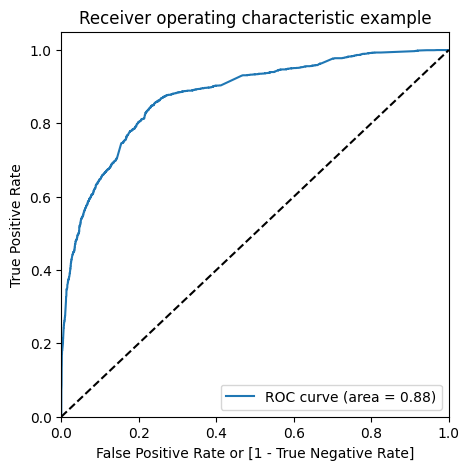

In [242]:
# Call ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [243]:
# create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          1         0.874880         9196          1    1    1    1    1   
1          0         0.542437         4696          1    1    1    1    1   
2          0         0.401676         3274          0    1    1    1    1   
3          0         0.072645         2164          0    1    0    0    0   
4          1         0.803848         1667          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    1    0  
1    1    1    0    0    0    0  
2    1    0    0    0    0    0  
3    0    0    0    0    0    0  
4    1    1    1    1    1    0

In [244]:
#  See the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.545875  0.977778  0.280526
0.2   0.2  0.764640  0.885535  0.690366
0.3   0.3  0.794958  0.850314  0.760948
0.4   0.4  0.803415  0.780294  0.817620
0.5   0.5  0.803415  0.660797  0.891036
0.6   0.6  0.798787  0.581971  0.931994
0.7   0.7  0.787299  0.517400  0.953117
0.8   0.8  0.763523  0.419287  0.975013
0.9   0.9  0.719164  0.278826  0.989696

In [245]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
#cut-off is 0.36

In [246]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  \
0          1         0.874880         9196          1    1    1    1    1   
1          0         0.542437         4696          1    1    1    1    1   
2          0         0.401676         3274          0    1    1    1    1   
3          0         0.072645         2164          0    1    0    0    0   
4          1         0.803848         1667          1    1    1    1    1   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1    1    0                1  
1    1    1    0    0    0    0                1  
2    1    0    0    0    0    0                1  
3    0    0    0    0    0    0                0  
4    1    1    1    1    1    0                1

In [247]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7986277325674166

In [248]:
# confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3069,  813],
       [ 449, 1936]])

In [249]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [250]:
# sensitivity
TP/(TP+FN)

0.8117400419287212

In [251]:
# specificity
TN/(TN+FP)

0.7905718701700154

In [ ]:
#Sensitivity and Specifivity is arround 80%

In [253]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Conversion_Prob  Prospect ID  final_predicted  Lead_Score
0          1         0.874880         9196                1          87
1          0         0.542437         4696                1          54
2          0         0.401676         3274                1          40
3          0         0.072645         2164                0           7
4          1         0.803848         1667                1          80

In [283]:
#Precision and Recall

from sklearn.metrics import precision_score, recall_score


In [285]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7042560931247727

In [286]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8117400419287212

In [ ]:
# Scaling Test Set

In [259]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
7681                     0.145327                                    1   
984                      0.085514                                    1   
8135                     0.426636                                    1   
6915                     0.065888                                    1   
2712                     0.117757                                    0   

      Lead Origin_Lead Add Form  Specialization_Not Specified  \
7681                          0                             0   
984                           0                             0   
8135                          0                             0   
6915                          0                             0   
2712                          0                             1   

      Lead Source_Welingak Website  Do Not Email_Yes  \
7681                             0                 0   
984                              0                 0   
8135                             0                 1   
6915                             0                 0   
2712                             0                 0   

      Last Activity_Olark Chat Conversation  \
7681                                      0   
984                                       0   
8135                                      0   
6915                                      0   
2712                                      0   

      What is your current occupation_Working Professional  \
7681                                                  0      
984                                                   0      
8135                                                  0      
6915                                                  0      
2712                                                  0      

      Last Notable Activity_Email Link Clicked  \
7681                                         0   
984                                          0   
8135                                         0   
6915                                         0   
2712                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
7681                                   0                               0   
984                                    0                               1   
8135                                   0                               0   
6915                                   1                               0   
2712                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
7681                                              0   
984                                               0   
8135                                              0   
6915                                              0   
2712                                              0   

      Last Notable Activity_Page Visited on Website  
7681                                              0  
984                                               0  
8135                                              0  
6915                                              0  
2712                                              0

In [260]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
7681                     0.145327                                    1   
984                      0.085514                                    1   
8135                     0.426636                                    1   
6915                     0.065888                                    1   
2712                     0.117757                                    0   

      Lead Origin_Lead Add Form  Specialization_Not Specified  \
7681                          0                             0   
984                           0                             0   
8135                          0                             0   
6915                          0                             0   
2712                          0                             1   

      Lead Source_Welingak Website  Do Not Email_Yes  \
7681                             0                 0   
984                              0                 0   
8135                             0                 1   
6915                             0                 0   
2712                             0                 0   

      Last Activity_Olark Chat Conversation  \
7681                                      0   
984                                       0   
8135                                      0   
6915                                      0   
2712                                      0   

      What is your current occupation_Working Professional  \
7681                                                  0      
984                                                   0      
8135                                                  0      
6915                                                  0      
2712                                                  0      

      Last Notable Activity_Email Link Clicked  \
7681                                         0   
984                                          0   
8135                                         0   
6915                                         0   
2712                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
7681                                   0                               0   
984                                    0                               1   
8135                                   0                               0   
6915                                   1                               0   
2712                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
7681                                              0   
984                                               0   
8135                                              0   
6915                                              0   
2712                                              0   

      Last Notable Activity_Page Visited on Website  
7681                                              0  
984                                               0  
8135                                              0  
6915                                              0  
2712                                              0

In [261]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
#Prediction

In [263]:
y_test_pred = res.predict(X_test_sm)

In [264]:
y_test_pred[:10]

7681    0.488075
984     0.100520
8135    0.350889
6915    0.139927
2712    0.225376
244     0.256738
4698    0.086277
8287    0.038350
6791    0.455933
8970    0.173776
dtype: float64

In [265]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [266]:
y_pred_1.head()

0
7681  0.488075
984   0.100520
8135  0.350889
6915  0.139927
2712  0.225376

In [267]:
y_test_df = pd.DataFrame(y_test)

In [268]:
#Assigning prospect id to index

y_test_df['Prospect ID'] = y_test_df.index

In [269]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [270]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [271]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         7681  0.488075
1          0          984  0.100520
2          0         8135  0.350889
3          0         6915  0.139927
4          1         2712  0.225376

In [272]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convertion_prob'})

In [273]:
y_pred_final.head()

Converted  Prospect ID  Convertion_prob
0          0         7681         0.488075
1          0          984         0.100520
2          0         8135         0.350889
3          0         6915         0.139927
4          1         2712         0.225376

In [274]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Convertion_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Convertion_prob.map( lambda x: round(x*100))

In [275]:
y_pred_final.head()

Prospect ID  Converted  Convertion_prob  Lead_Score
0         7681          0         0.488075          49
1          984          0         0.100520          10
2         8135          0         0.350889          35
3         6915          0         0.139927          14
4         2712          1         0.225376          23

In [276]:
y_pred_final['final_Predicted'] = y_pred_final.Convertion_prob.map(lambda x: 1 if x > 0.36 else 0)

In [277]:
y_pred_final.head()

Prospect ID  Converted  Convertion_prob  Lead_Score  final_Predicted
0         7681          0         0.488075          49                1
1          984          0         0.100520          10                0
2         8135          0         0.350889          35                0
3         6915          0         0.139927          14                0
4         2712          1         0.225376          23                0

In [278]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7993298585256887

In [279]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1318,  358],
       [ 181,  829]])

In [280]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [281]:
#sensitivity

TP / float(TP+FN)

0.8207920792079207

In [282]:
#Specificity

TN / float(TN+FP)

0.7863961813842482

In [288]:
#Precision and Recall

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6983993260320135

In [289]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8207920792079207

In [ ]:
#Test Data
# Accuracy around 80%
# Sensitivity around 82%
# Specificity aroud 79%

In [ ]:
#With the current cut off as 0.36 we have Precision around 70% , Recall around 82% and accuracy 80%.

#The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

In [ ]:
#Lead Origin_Landing Page Submission
#Last Notable Activity_Modified
#Specialization_Not Specified
#Last Notable Activity_Email Opened
#Total Time Spent on Website
#Last Activity_Olark Chat Conversation
#Lead Origin_Lead Add Form
#Last Notable Activity_Olark Chat Conversation
#Lead Source_Welingak Website
#What is your current occupation_Working Profes..
#Do Not Email_Yes
#Last Notable Activity_Page Visited on Website
#Last Notable Activity_Email Link Clicked

#These variable affects the Education company to identify more clients